# Heart Disease Prediction Project

# Part 1- DEFINE

### ---- 1 Define the problem ----

Coronary artery disease (CAD) is a major cause of death and disability in developed countries and is responsible for approximately one-third of all deaths in people over age 35. In fact, according to the World Health Organization, more than 60% of the CAD cases occurs in developing countries and is the **leading** cause of death worldwide with 3.8 million men and 3.4 million women affected each year.

CAD is a chronic disease wherein the coronary arteries that are solely responsible for supplying oxygenated blood to the heart get narrowed and are not able to supply enough fresh blood to this organ. Narrowing of these blood vessels can be due to arteriosclerosis, where plaques form on the inner surfaces of the arteries thus preventing blood flow and compromising the ability of the heart to receive enough oxygen and nutrition, which can result in angina pectoris (chest pain) and **heart attack**. 

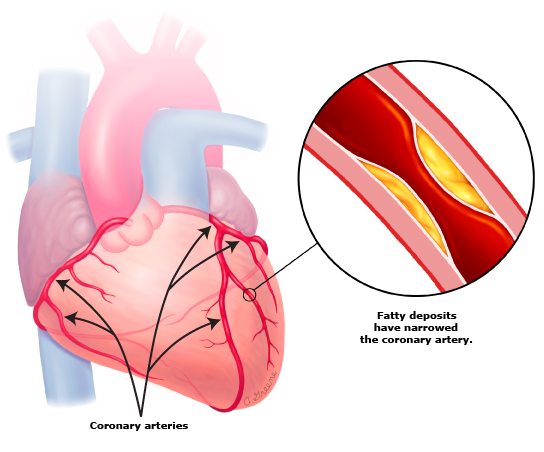

Thus, CAD prevention has been a major goal for healthcare organizations and physicians use a myraid of heart disease risk factors to assess the risk of CAD in a patient. Some of the CAD risk factors are hypertension, high total cholesterol, high triglyercides (type of fat), diabetes, smoking, obesity, age, gender, physical inactivity, family history of CAD and stress. 

Therefore, medical diagnosis is a very complex task and computer-based medical diagnosis systems can aid in the clinical decision support and **classification** of a patient as having or not having coronary artery disease. 

This report will detail the data mining methodology as well as the results of my chosen classification system for this problem. It will highlight the most important predictors for CAD.



In [6]:
#Analysis Packages 

import pandas as pd 
import os
import sklearn as sk
import numpy as np
import scipy.stats as sp

__author__ = "Pirammiya Shanmugathas"
__email__ = "pirammya666@hotmail.com"

In [7]:
#Visualization Packages

import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib.ticker import MaxNLocator
import seaborn as sns

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [8]:
missing_values = ["n/a", "na", "--", "?"]

df_heart_raw=pd.read_csv ('/Users/pirammiyashan/Desktop/skill acquisition/coding projects/heart.csv',na_values=missing_values)

#https://www.biorxiv.org/content/10.1101/2020.02.13.948414v1.full.pdf
#https://github.com/aa54/CAD_1/blob/master/uci_cleveland_cda.R

In [9]:
df_heart_raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
list(df_heart_raw.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [11]:
#change column names for clarity

#https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model

df_heart_raw.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df_heart_raw.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [12]:
df_heart_raw.shape
#303 subjects in total

(303, 14)

### ---- 3 Clean the data ----

Duplicate data, invalid data or corrupt data were identified and removed. 

In [13]:
df_heart_raw.isnull().sum()

#there is no missingness 

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [14]:
df_heart_raw.duplicated().sum()

#There is one duplicate entry in this dataset which needs to be removed.

1

In [15]:
df_heart_raw[df_heart_raw.duplicated()]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [16]:
df_heart_raw.iloc[164]
#It is determined that location 163 and 164 are duplicates of each other.

age                         38.0
sex                          1.0
chest_pain_type              2.0
resting_blood_pressure     138.0
cholesterol                175.0
fasting_blood_sugar          0.0
rest_ecg                     1.0
max_heart_rate_achieved    173.0
exercise_induced_angina      0.0
st_depression                0.0
st_slope                     2.0
num_major_vessels            4.0
thalassemia                  2.0
target                       1.0
Name: 164, dtype: float64

In [17]:
df_heart_raw.iloc[163]

age                         38.0
sex                          1.0
chest_pain_type              2.0
resting_blood_pressure     138.0
cholesterol                175.0
fasting_blood_sugar          0.0
rest_ecg                     1.0
max_heart_rate_achieved    173.0
exercise_induced_angina      0.0
st_depression                0.0
st_slope                     2.0
num_major_vessels            4.0
thalassemia                  2.0
target                       1.0
Name: 163, dtype: float64

In [18]:
df_heart_raw=df_heart_raw.drop_duplicates()
#After the duplicate entry was dropped, there are now 302 participants in the dataset as opposed to the original 303.

In [19]:
df_heart_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    int64  
 2   chest_pain_type          302 non-null    int64  
 3   resting_blood_pressure   302 non-null    int64  
 4   cholesterol              302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    int64  
 6   rest_ecg                 302 non-null    int64  
 7   max_heart_rate_achieved  302 non-null    int64  
 8   exercise_induced_angina  302 non-null    int64  
 9   st_depression            302 non-null    float64
 10  st_slope                 302 non-null    int64  
 11  num_major_vessels        302 non-null    int64  
 12  thalassemia              302 non-null    int64  
 13  target                   302 non-null    int64  
dtypes: float64(1), int64(13)
m

### ---- 3 Explore the data (EDA) ----

Hypothesis 1: The risk of Coronary Artery Disease increases with age and is much steeper after the age of 55. <br>

Hypothesis 2: There is a high chance of getting CAD if the patient has typical angina, is age 40 and male. <br>

Hypothesis 3: Blood pressure greater than 120 (pre-hypertension) have increased risk of heart disease. <br>

Hypothesis 4: Borderline high Cholesterol (200-237 mg/dL) and greater correlation with heart disease. <br>

Hypothesis 5: Determine if highest counts of CAD are patients with the following: <br>

(1) older adults (55+) <br>
(2) angina not induced by exercise <br>
(3) 2 major vessels coloured <br>
(4) thalium stress result showing reversible defect <br>
(5) ST/HR slope high <br>



target                     1.000000
chest_pain_type            0.432080
max_heart_rate_achieved    0.419955
st_slope                   0.343940
rest_ecg                   0.134874
fasting_blood_sugar       -0.026826
cholesterol               -0.081437
resting_blood_pressure    -0.146269
age                       -0.221476
sex                       -0.283609
thalassemia               -0.343101
num_major_vessels         -0.408992
st_depression             -0.429146
exercise_induced_angina   -0.435601
Name: target, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e15b220>,
      dtype=object)

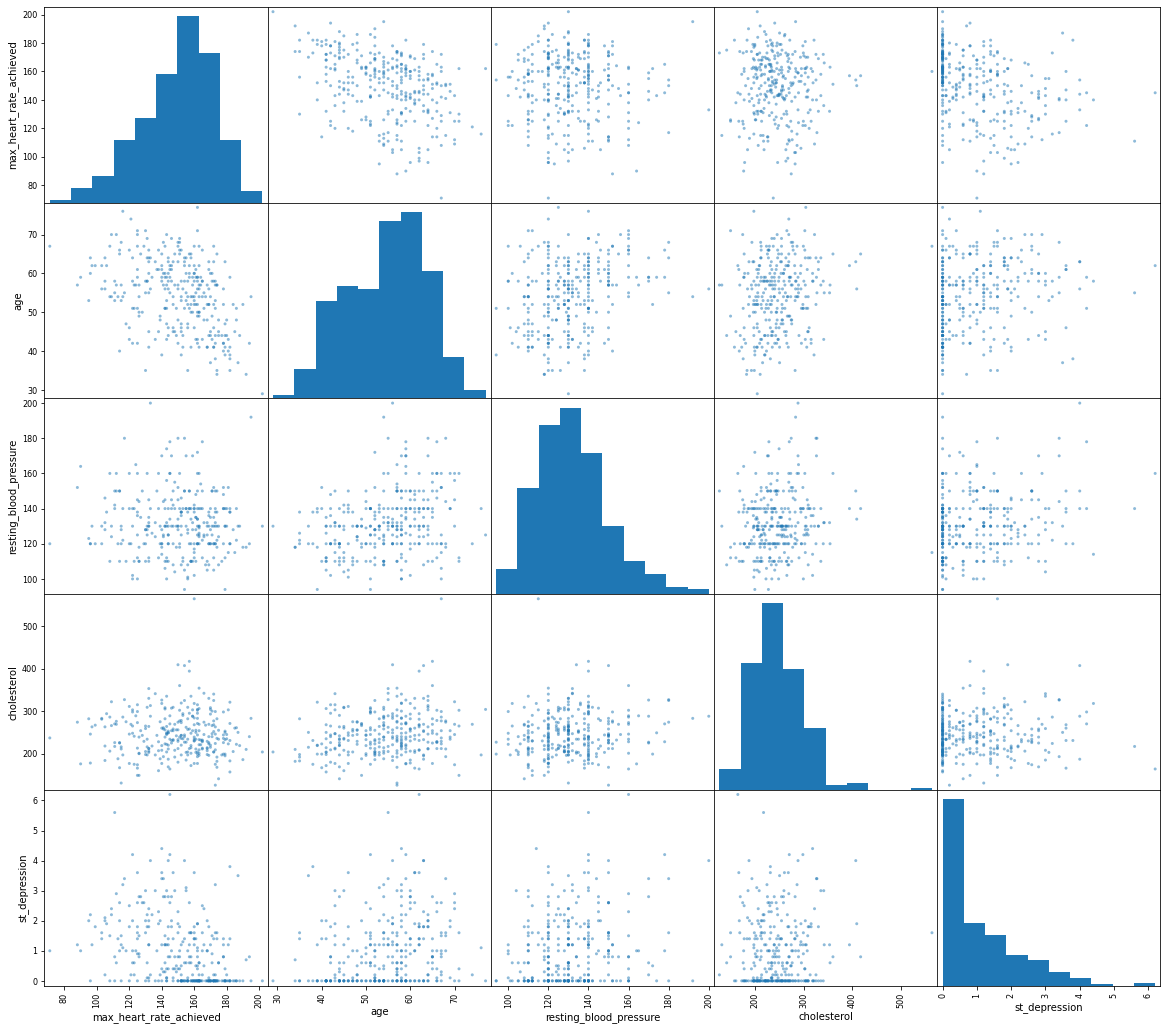

In [20]:
corr_matrix= df_heart_raw.corr()

print(corr_matrix["target"].sort_values(ascending=False))

from pandas.plotting import scatter_matrix
attributes = ["max_heart_rate_achieved","age", "resting_blood_pressure","cholesterol","st_depression"]
scatter_matrix(df_heart_raw[attributes], figsize=(20, 18))

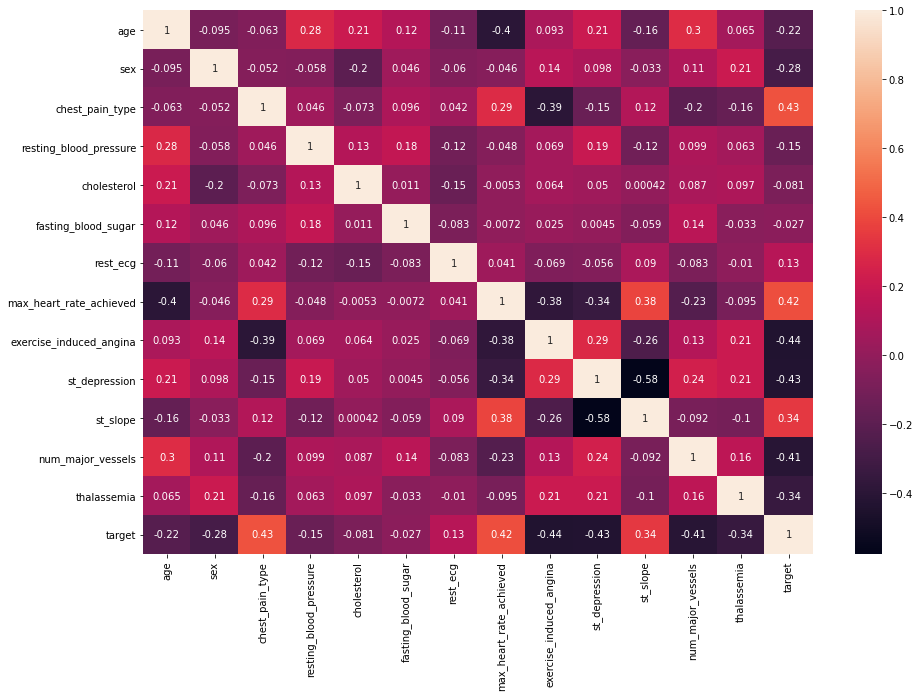

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#violin plot
#https://www.kaggle.com/sanchitakarmakar/heart-failure-prediction-visualization/notebook

In [17]:
#change the data types as many of the categorical variables have type integer values, which is not correct.

df_heart_raw.dtypes


age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [18]:
df_heart_raw[["sex"]] = df_heart_raw[["sex"]].astype('category')
df_heart_raw[["chest_pain_type"]] = df_heart_raw[["chest_pain_type"]].astype('category')
df_heart_raw[["fasting_blood_sugar"]] = df_heart_raw[["fasting_blood_sugar"]].astype('category')
df_heart_raw[["rest_ecg"]] = df_heart_raw[["rest_ecg"]].astype('category')
df_heart_raw[["exercise_induced_angina"]] = df_heart_raw[["exercise_induced_angina"]].astype('category')
df_heart_raw[["st_slope"]] = df_heart_raw[["st_slope"]].astype('category')
df_heart_raw[["thalassemia"]] = df_heart_raw[["thalassemia"]].astype('category')
df_heart_raw[["target"]] = df_heart_raw[["target"]].astype('category')

df_heart_raw.dtypes

/Users/pirammiyashan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


age                           int64
sex                        category
chest_pain_type            category
resting_blood_pressure        int64
cholesterol                   int64
fasting_blood_sugar        category
rest_ecg                   category
max_heart_rate_achieved       int64
exercise_induced_angina    category
st_depression               float64
st_slope                   category
num_major_vessels             int64
thalassemia                category
target                     category
dtype: object

Text(0.5, 1.0, 'Heart Disease Frequency for Ages')

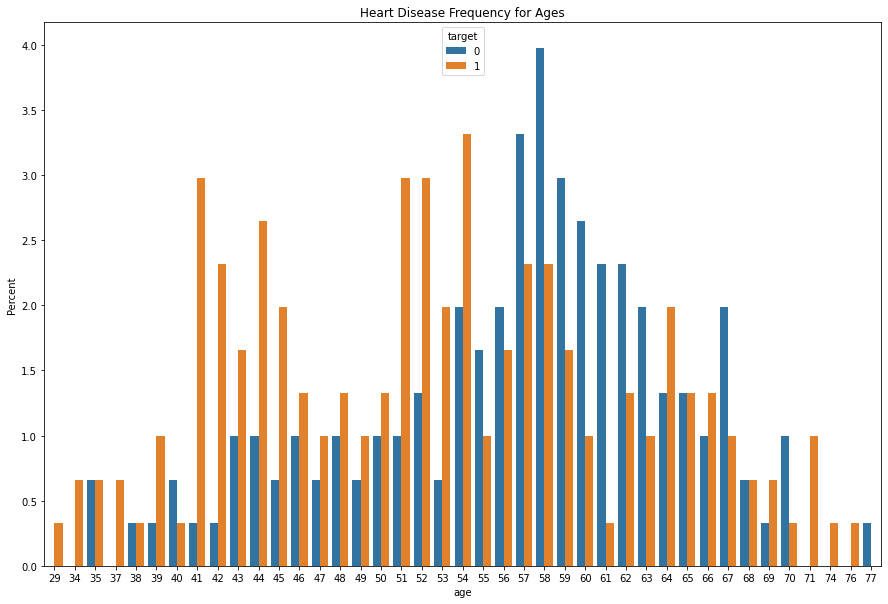

In [36]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="age", y="age", hue="target", data=df_heart_raw, estimator=lambda x: len(x) / len(df_heart_raw) * 100)
ax.set(ylabel="Percent")
plt.title('Heart Disease Frequency for Ages')

#“age:” “Young adult” (18-35 years old), “middle-aged adults” (36-55 years old), and “older adults” (older than 55 years old);[58]

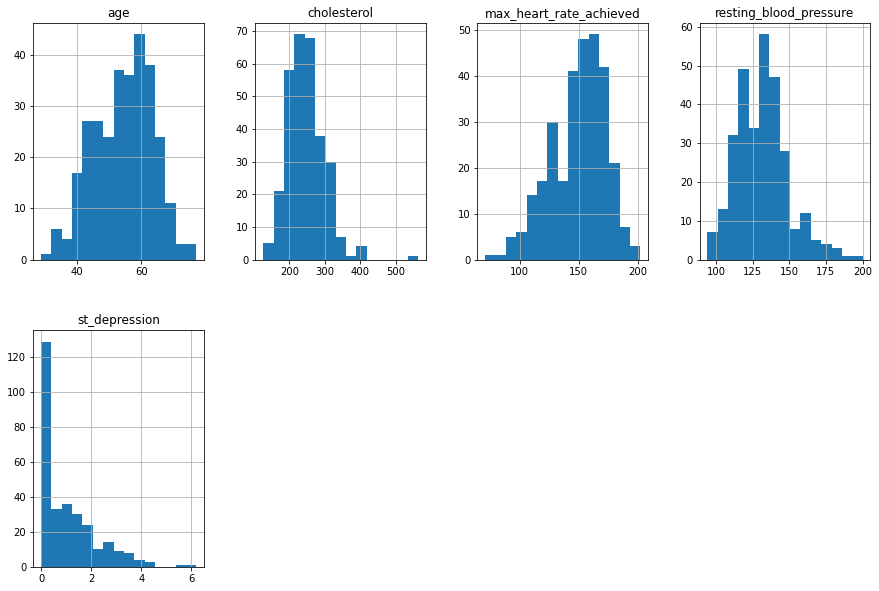

In [28]:
numerical_variables = ["max_heart_rate_achieved","age", "resting_blood_pressure","cholesterol","st_depression"]
categorical_variables = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','st_slope','num_major_vessels','thalassemia']
df_heart_raw[numerical_variables].hist(bins=15, figsize=(15, 10), layout=(2, 4));

#sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
#sns.distplot(
#   heart_raw['thalach'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
#).set(xlabel='', ylabel='Count');


When looking at the raw distribution of the data, it appears that most patients have ranges of cholesterol between  approximately 225-275 mg/dL, ages 60, st_depression peak at 0, blood pressures ranging between 130 and 140. 


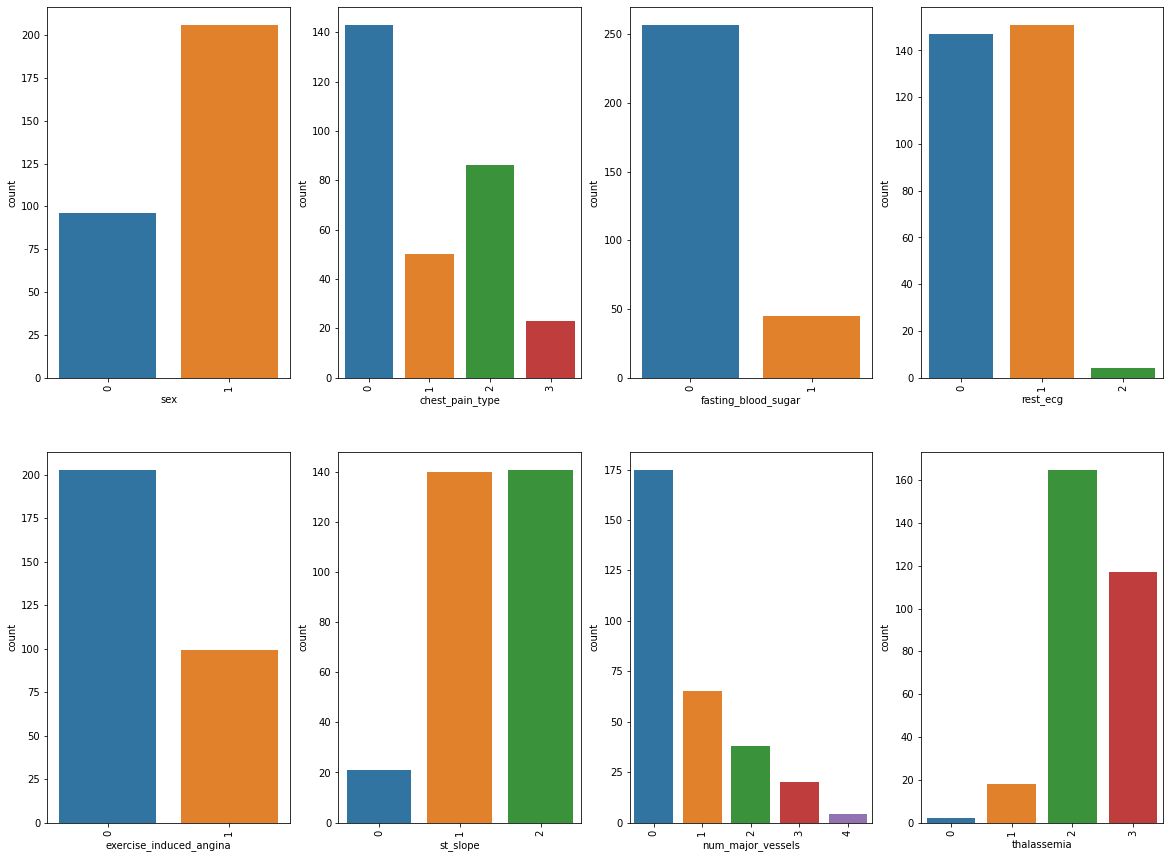

In [30]:
fig, ax = plt.subplots(2,4, figsize=(20, 15))
for variable, subplot in zip(categorical_variables, ax.flatten()):
    sns.countplot(df_heart_raw[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#remove outlier for restecg and thal

There are also more females than males in this dataset, most people have a health blood sugar (of less than 120mg/ml), and more people with chest pain induced by exercise (exercise induced angina with a value of 0 indicating pain induced by exercise).


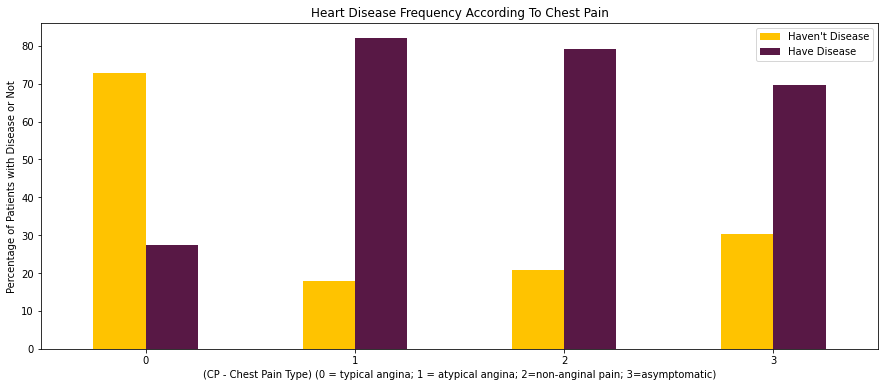

In [22]:
pd.crosstab(df_heart_raw.chest_pain_type,df_heart_raw.target).apply(lambda r: r/r.sum()*100, axis=1).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To Chest Pain')
plt.xlabel('(CP - Chest Pain Type) (0 = typical angina; 1 = atypical angina; 2=non-anginal pain; 3=asymptomatic)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Percentage of Patients with Disease or Not')
plt.show()


Contrary to hypothesis 2 which stated that there is a high chance of getting CAD if the patient has typical angina, is age 40 and male, this graph shows the greatest percentage of CAD in patients who have other kinds of angina and typical angina has the lowest count of those CAD.

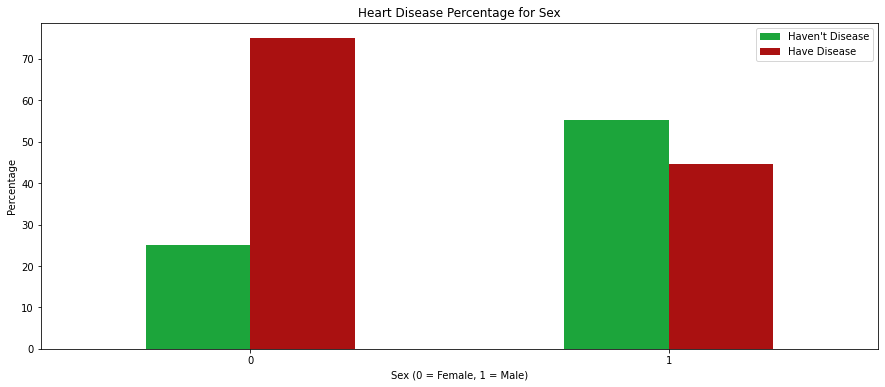

In [23]:
pd.crosstab(df_heart_raw.sex,df_heart_raw.target).apply(lambda r: r/r.sum()*100, axis=1).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Percentage for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Percentage')
plt.show()

As shown in the correlation matrix earlier, there is a slight negative correlation (of -0.28) between having CAD and being male, thus there is a greater correlation between being a female and having CAD.

This is also illustrated in this bar plot where there are significantly more females who have CAD than those who do not, but the number of males who have CAD are somewhat comparable to those who do not.

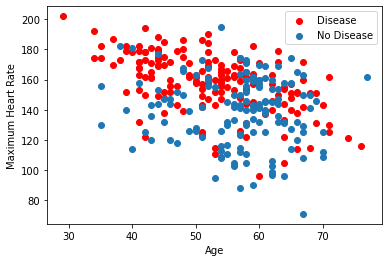

In [24]:
plt.scatter(x=df_heart_raw.age [df_heart_raw.target==1], y=df_heart_raw.max_heart_rate_achieved [(df_heart_raw.target==1)], c="red")
plt.scatter(x=df_heart_raw.age [df_heart_raw.target==0], y=df_heart_raw.max_heart_rate_achieved[(df_heart_raw.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [25]:
df_heart_raw = pd.get_dummies(df_heart_raw)
df_heart_raw.head(10)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,...,exercise_induced_angina_1,st_slope_0,st_slope_1,st_slope_2,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,target_0,target_1
0,63,145,233,150,2.3,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,37,130,250,187,3.5,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,56,120,236,178,0.8,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
4,57,120,354,163,0.6,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
5,57,140,192,148,0.4,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
6,56,140,294,153,1.3,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
7,44,120,263,173,0.0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
8,52,172,199,162,0.5,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
9,57,150,168,174,1.6,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


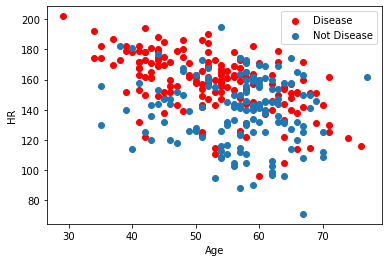

In [26]:
plt.scatter(x=df_heart_raw.age [df_heart_raw.target==1], y=df_heart_raw.max_heart_rate_achieved [(df_heart_raw.target==1)], c="red")
plt.scatter(x=df_heart_raw.age [df_heart_raw.target==0], y=df_heart_raw.max_heart_rate_achieved[(df_heart_raw.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("HR")
plt.show()

([<matplotlib.axis.XTick at 0x122afb790>,
 <a list of 5 Text major ticklabel objects>)

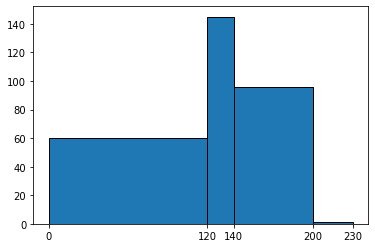

In [75]:
bins= [0,120,140,200,230]
plt.hist(df_heart_raw.resting_blood_pressure, bins=bins, edgecolor="k")
plt.xticks(bins)


In [51]:
df_heart_raw[df_heart_raw.resting_blood_pressure.between(120,140)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [48]:
sum((df_heart_raw.resting_blood_pressure)>140)


65

### ---- 5 Establish a baseline ----

In [ ]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### Baseline Model

In order to prepare the data for machine learning:

One must:

1) One-hot encode categorical variables
2) Split data into features and labels
3) Convert to arrays
4) Split data into training and testing sets

In [ ]:
a = pd.get_dummies(df_heart_raw['cp'], prefix = "cp")
b = pd.get_dummies(df_heart_raw['thal'], prefix = "thal")
c = pd.get_dummies(df_heart_raw['slope'], prefix = "slope")
d = pd.get_dummies(df_heart_raw['sex'], prefix = "sex")
e = pd.get_dummies(df_heart_raw['fbs'], prefix = "fbs")
f = pd.get_dummies(df_heart_raw['restecg'], prefix = "restecg")
g = pd.get_dummies(df_heart_raw['exang'], prefix = "exang")


frames = [df_heart_raw, a, b, c,d,e,f,g]
df_heart_raw = pd.concat(frames, axis = 1)
df_heart_raw.head()


In [ ]:
# Labels are the values we want to predict
labels = np.array(df_heart_raw['target'])
# Remove the labels from the features

# axis 1 refers to the columns
df_heart_raw= df_heart_raw.drop('target', axis = 1)

# Saving feature names for later use
feature_list = list(df_heart_raw.columns)

# Convert to numpy array
df_heart_raw = np.array(df_heart_raw)


In [ ]:

df_heart_raw['sex'][df_heart_raw['sex'] == 0] = 'female'
df_heart_raw['sex'][df_heart_raw['sex'] == 1] = 'male'

df_heart_raw['chest_pain_type'][df_heart_raw['chest_pain_type'] == 0] = 'typical angina'
df_heart_raw['chest_pain_type'][df_heart_raw['chest_pain_type'] == 1] = 'atypical angina'
df_heart_raw['chest_pain_type'][df_heart_raw['chest_pain_type'] == 2] = 'non-anginal pain'
df_heart_raw['chest_pain_type'][df_heart_raw['chest_pain_type'] == 3] = 'asymptomatic'

df_heart_raw['fasting_blood_sugar'][df_heart_raw['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df_heart_raw['fasting_blood_sugar'][df_heart_raw['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df_heart_raw['rest_ecg'][df_heart_raw['rest_ecg'] == 0] = 'normal'
df_heart_raw['rest_ecg'][df_heart_raw['rest_ecg'] == 1] = 'ST-T wave abnormality'
df_heart_raw['rest_ecg'][df_heart_raw['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df_heart_raw['exercise_induced_angina'][df_heart_raw['exercise_induced_angina'] == 0] = 'yes'
df_heart_raw['exercise_induced_angina'][df_heart_raw['exercise_induced_angina'] == 1] = 'no'

df_heart_raw['st_slope'][df_heart_raw['st_slope'] == 0] = 'upsloping'
df_heart_raw['st_slope'][df_heart_raw['st_slope'] == 1] = 'flat'
df_heart_raw['st_slope'][df_heart_raw['st_slope'] == 2] = 'downsloping'

df_heart_raw['thalassemia'][df_heart_raw['thalassemia'] == 1] = 'normal'
df_heart_raw['thalassemia'][df_heart_raw['thalassemia'] == 2] = 'fixed defect'
df_heart_raw['thalassemia'][df_heart_raw['thalassemia'] == 3] = 'reversable defect'

df_heart_raw

### ---- 6 Hypothesize solution ----

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df_heart_raw, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


In [ ]:
train_features

In [ ]:
Improvements: 
    
#1. Not satisfied with binary classification of 50% narrowing, should be atleast 4 levels
#2. fitness level and diet